In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [3]:
data = pd.read_csv("predictions 3.2.csv")
label = pickle_load("", "test_data_y.pk")

In [4]:
data = np.array(data)
label = np.array(label)
print(data.shape, label.shape)

(1000, 513) (1000,)


In [5]:
# Deleting first colum (Data serial)
data = data[:, 1:]
print(data.shape, label.shape)

(1000, 512) (1000,)


In [6]:
# applying Chy Square test
from sklearn.feature_selection import SelectKBest, chi2

# chi2_features = SelectKBest(chi2, k=3)
# X_kbest_features = chi2_features.fit_transform(data, label)

chi_scores = chi2(data, label)
chi_scores = np.array(chi_scores)

print(data.shape, chi_scores.shape)

(1000, 512) (2, 512)


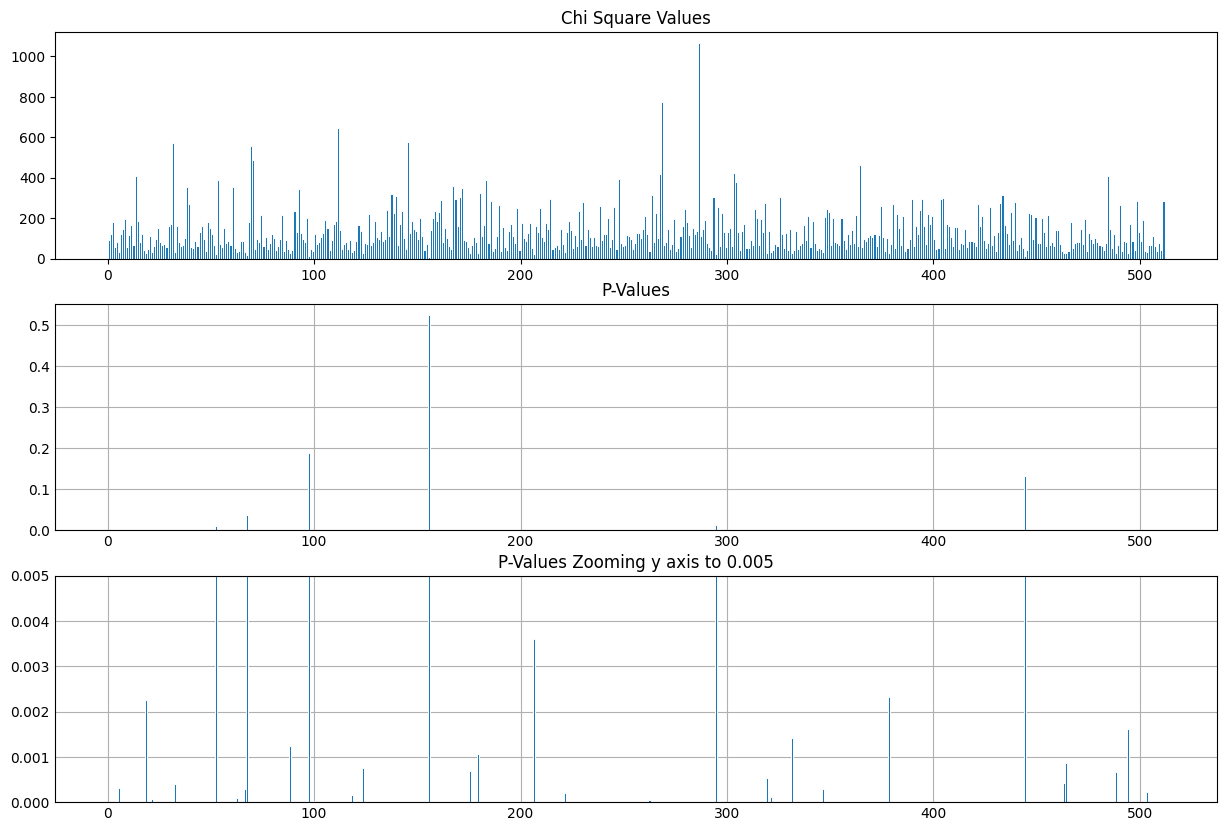

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Ploting Chi square values
plt.subplot(3,1,1)
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(len(chi_scores[0]))

# plot
# fig, ax = plt.subplots()

plt.bar(x, chi_scores[0][:], width=1, edgecolor="white", linewidth=0.7)
plt.title("Chi Square Values")

####################################################################

# Ploting P-values
plt.subplot(3,1,2)
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(len(chi_scores[1]))

# plot
# fig, ax = plt.subplots()

plt.bar(x, chi_scores[1][:], width=1, edgecolor="white", linewidth=0.7)
plt.title("P-Values")
# plt.ylim([0.0, 0.005])

#####################################################################

# Ploting P-values  Zooming y axis to 0.005
plt.subplot(3,1,3)
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(len(chi_scores[1]))

# plot
# fig, ax = plt.subplots()

plt.bar(x, chi_scores[1][:], width=1, edgecolor="white", linewidth=0.7)
plt.title("P-Values Zooming y axis to 0.005")
plt.ylim([0.0, 0.005])

plt.show()